In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from parse import *
import os
import itertools

# F1 Scores

In [2]:
df1 = pd.read_csv("all_training_logs_in_one_file.csv")
df1

,metric,value,step
0,em_DBLP-GoogleScholar-dirty_lm_roberta_da_auto...,0.386496,1.0
1,em_DBLP-GoogleScholar-dirty_lm_roberta_da_auto...,0.748722,2.0
2,em_DBLP-GoogleScholar-dirty_lm_roberta_da_auto...,0.851966,3.0
3,em_DBLP-GoogleScholar-dirty_lm_roberta_da_auto...,0.893123,4.0
4,em_DBLP-GoogleScholar-dirty_lm_roberta_da_auto...,0.888889,5.0
...,...,...,...
35055,em_DBLP-GoogleScholar_lm_roberta_da_invda_alph...,0.887546,16.0
35056,em_DBLP-GoogleScholar_lm_roberta_da_invda_alph...,0.886704,17.0
35057,em_DBLP-GoogleScholar_lm_roberta_da_invda_alph...,0.887119,18.0
35058,em_DBLP-GoogleScholar_lm_roberta_da_invda_alph...,0.886908,19.0


In [3]:
da_pattern = "{dataset}_lm_{lm}_da_{da}_alpha_{alpha}_id_{id}_size_{size}"
pattern = "{dataset}_da_{da}_id_{id}_size_{size}"

def parser(s):
    res = parse(da_pattern, s)
    if not res:
        res = parse(pattern, s)
        if not res:
            print(s)
        res.named["alpha"] = "None"
        res.named["lm"] = "dm"
    return res

In [4]:
parsed = df1["metric"].apply(lambda x: parser(x))

In [5]:
dataset = parsed.apply(lambda x: x.named["dataset"])
lm = parsed.apply(lambda x: x.named["lm"])
da = parsed.apply(lambda x: x.named["da"])
alpha = parsed.apply(lambda x: x.named["alpha"])
id_ = parsed.apply(lambda x: x.named["id"])
size = parsed.apply(lambda x: x.named["size"])

In [6]:
df_add = pd.DataFrame(data=[dataset, lm, da, alpha, id_, size],columns=["dataset", "lm", "da", "alpha", "id_", "size"])

In [7]:
df2 = pd.concat([dataset, lm, da, alpha, id_, size, df1.drop(columns="metric")], axis=1)
df2.columns = ["dataset", "lm", "da", "alpha", "id_", "size", "test_f1", "step"]
df2

,dataset,lm,da,alpha,id_,size,test_f1,step
0,em_DBLP-GoogleScholar-dirty,roberta,auto_ssl,0.8,4,750,0.386496,1.0
1,em_DBLP-GoogleScholar-dirty,roberta,auto_ssl,0.8,4,750,0.748722,2.0
2,em_DBLP-GoogleScholar-dirty,roberta,auto_ssl,0.8,4,750,0.851966,3.0
3,em_DBLP-GoogleScholar-dirty,roberta,auto_ssl,0.8,4,750,0.893123,4.0
4,em_DBLP-GoogleScholar-dirty,roberta,auto_ssl,0.8,4,750,0.888889,5.0
...,...,...,...,...,...,...,...,...
35055,em_DBLP-GoogleScholar,roberta,invda,0.8,4,600,0.887546,16.0
35056,em_DBLP-GoogleScholar,roberta,invda,0.8,4,600,0.886704,17.0
35057,em_DBLP-GoogleScholar,roberta,invda,0.8,4,600,0.887119,18.0
35058,em_DBLP-GoogleScholar,roberta,invda,0.8,4,600,0.886908,19.0


In [8]:
df2 = df2[df2.step == 20.0]

In [9]:
df3 = df2.groupby(by=["dataset", "lm", "da", "size"]).max()

In [10]:
pd.set_option('display.max_rows', df3.shape[0] + 1)
df3

alpha id_  \
dataset                     lm      da                      size             
em_Abt-Buy                  dm      dm                      300   None   4   
                                                            450   None   4   
                                                            600   None   4   
                                                            750   None   4   
                            roberta None                    300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    auto_ssl                300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    auto_ssl_no_ssl         300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    dacon_baseline          300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    dacon_consistency       300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    dacon_fixed_consistency 300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    dacon_one_to_many       300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    del                     300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    edbt20                  300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
                                    invda                   300    0.8   4   
                                                            450    0.8   4   
                                                            600    0.8   4   
                                                            750    0.8   4   
em_Amazon-Google            dm      dm                      300   None   4   
                                                            450   None   4   
                                                            600   None   4   
                                                            750   None   4   
                            roberta None                    300    0.8   4   
                                                            450    0.8   4   
         

In [11]:
lm_da = {
    "DM + RoBERTa": ["dm", "dm"],
    "RoBERTa": ["roberta", "None"],
    "InvDA": ["roberta", "invda"],
    "Rotom": ["roberta", "auto_ssl_no_ssl"],
    "Rotom + SSL": ["roberta", "auto_ssl"],
    "DACon Baseline": ["roberta", "dacon_baseline"],
    "DACon One-to-Many": ["roberta", "dacon_one_to_many"],
    "DACon Fixed Consistency": ["roberta", "dacon_fixed_consistency"],
    "DACon Consistency": ["roberta", "dacon_consistency"],  
}

/var/folders/zl/yc2y215n1d3gj37jjg_cv5dr0000gn/T/ipykernel_12164/2900364749.py:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.3, hspace=0.3)


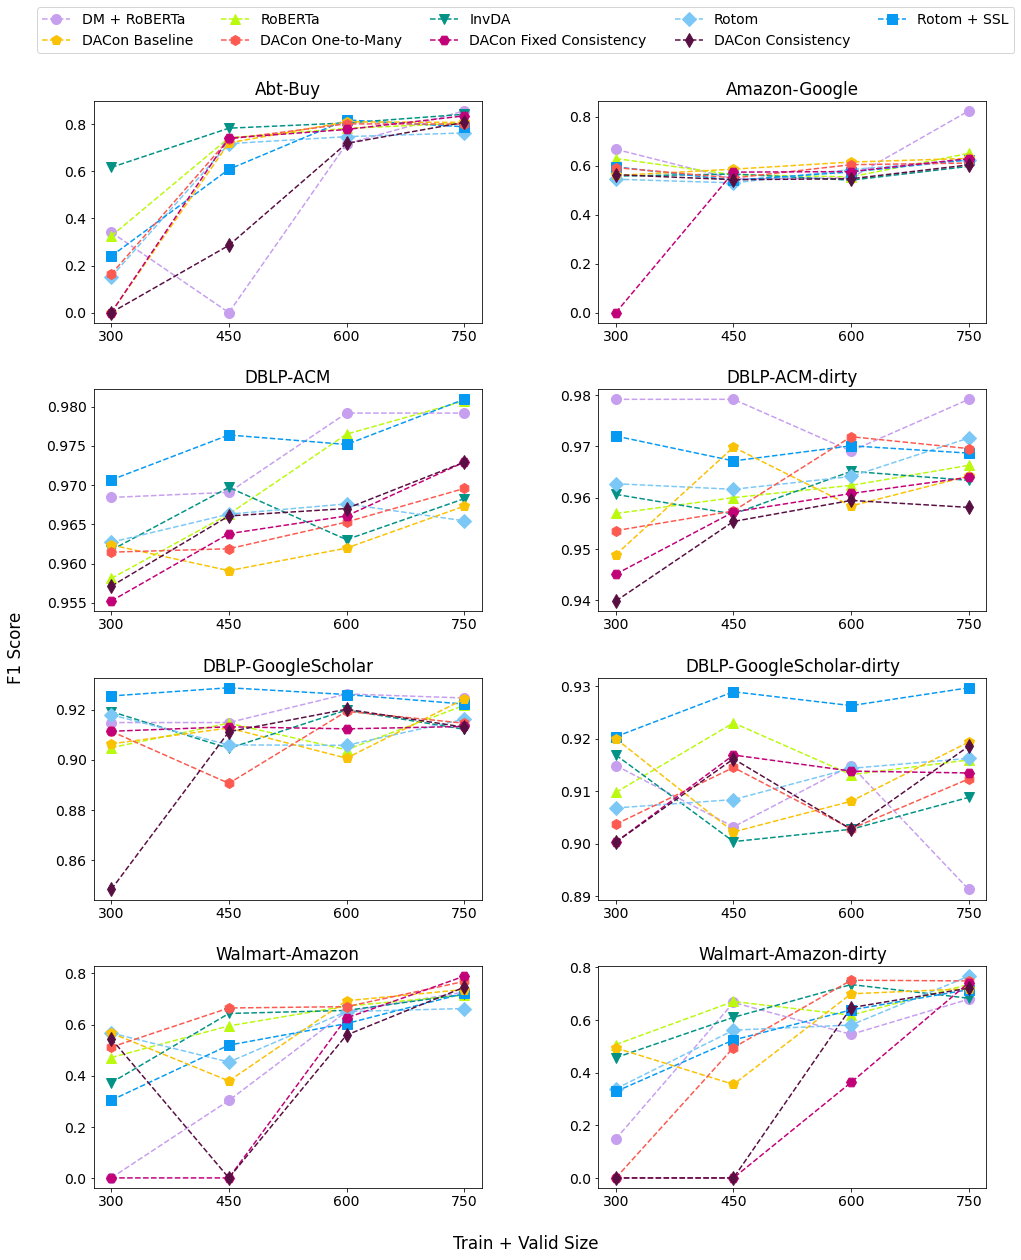

<Figure size 432x288 with 0 Axes>

In [12]:
tmp = df3.reset_index()

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

plt.rcParams["font.size"] = 14
fig, axes = plt.subplots(4, 2, figsize=(16, 20), constrained_layout=True)
sizes = [300, 450, 600, 750]
markers = ["o", "^", "v", "D", "s", "p", "h", "H", "d"]
colors = ["#C79FEF", "#BBF90F", "#029386", "#7BC8F6", "#069AF3", "#FAC205", "#FC5A50", "#C20078", "#580F41"]
fig.supxlabel("Train + Valid Size", y=0.08)
fig.supylabel("F1 Score", x=0.05)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i, dataset in enumerate(tmp["dataset"].unique()):
    group_by_data = tmp[tmp["dataset"] == dataset]
    row, col = i // 2, i % 2
    
    ax = axes[row, col]
    ax.set_xticks(sizes)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(dataset.split("_")[-1])
    
    for j, (name, (lm, da)) in enumerate(lm_da.items()):
        subgroup = group_by_data[(group_by_data["lm"] == lm) & (group_by_data["da"] == da)]
        f1 = list(subgroup["test_f1"])
        line = ax.plot(
            sizes, 
            f1,
            marker=markers[j], 
            markersize=10.0,
            linestyle="--",
            label=name,
            c=colors[j]
        )

lines, labels = axes[0, 0].get_legend_handles_labels()
ncol = 5

fig.legend(flip(lines, ncol), flip(labels, ncol), bbox_to_anchor=(0.5, 0.95), loc="upper center", ncol=ncol)

if not os.path.isdir("exp_figures"):
    os.makedirs("exp_figures", exist_ok=True)

plt.savefig("exp_figures/f1_score.png", facecolor="white", bbox_inches="tight", pad_inches=0.3)
plt.show()
plt.clf()

In [13]:
df4 = df2.groupby(by=["dataset", "lm", "da"]).max()

In [14]:
pd.set_option('display.max_rows', df4.shape[0] + 1)
df4

alpha id_ size  \
dataset                     lm      da                                       
em_Abt-Buy                  dm      dm                       None   4  750   
                            roberta None                      0.8   4  750   
                                    auto_ssl                  0.8   4  750   
                                    auto_ssl_no_ssl           0.8   4  750   
                                    dacon_baseline            0.8   4  750   
                                    dacon_consistency         0.8   4  750   
                                    dacon_fixed_consistency   0.8   4  750   
                                    dacon_one_to_many         0.8   4  750   
                                    del                       0.8   4  750   
                                    edbt20                    0.8   4  750   
                                    invda                     0.8   4  750   
em_Amazon-Google            dm      dm                       None   4  750   
                            roberta None                      0.8   4  750   
                                    auto_ssl                  0.8   4  750   
                                    auto_ssl_no_ssl           0.8   4  750   
                                    dacon_baseline            0.8   4  750   
                                    dacon_consistency         0.8   4  750   
                                    dacon_fixed_consistency   0.8   4  750   
                                    dacon_one_to_many         0.8   4  750   
                                    del                       0.8   4  750   
                                    edbt20                    0.8   4  750   
                                    invda                     0.8   4  750   
em_DBLP-ACM                 dm      dm                       None   4  750   
                            roberta None                      0.8   4  750   
                                    auto_ssl                  0.8   4  750   
                                    auto_ssl_no_ssl           0.8   4  750   
                                    dacon_baseline            0.8   4  750   
                                    dacon_consistency         0.8   4  750   
                                    dacon_fixed_consistency   0.8   4  750   
                                    dacon_one_to_many         0.8   4  750   
                                    del                       0.8   4  750   
                                    edbt20                    0.8   4  750   
                                    invda                     0.8   4  750   
em_DBLP-ACM-dirty           dm      dm                       None   4  750   
                            roberta None                      0.8   4  750   
                                    auto_ssl                  0.8   4  750   
                                    auto_ssl_no_ssl           0.8   4  750   
                                    dacon_baseline            0.8   4  750   
                                    dacon_consistency         0.8   4  750   
                                    dacon_fixed_consistency   0.8   4  750   
                                    dacon_one_to_many         0.8   4  750   
                                    del                       0.8   4  750   
                                    edbt20                    0.8   4  750   
                                    invda                     0.8   4  750   
em_DBLP-GoogleScholar       dm      dm                       None   4  750   
                            roberta None                      0.8   4  750   
                                    auto_ssl                  0.8   4  750   
                                    auto_ssl_no_ssl           0.8   4  750   
                                    dacon_baseline            0.8   4  750   
                                    dacon_consistency         0.8   4  750   
    

# Training Time

In [15]:
t_da_pattern = "{dataset}_lm={lm}_da={da}_alpha={alpha}_id={id}_size={size}"
t_pattern = "{dataset}_da={da}_id={id}_size={size}"

def t_parser(s):
    res = parse(t_da_pattern, s)
    if not res:
        res = parse(t_pattern, s)
        res.named["alpha"] = "None"
        res.named["lm"] = "dm"
    return res

In [16]:
df5 = pd.read_csv("execution_time.csv", names=["exp", "time"])
df5

,exp,time
0,em_Amazon-Google_lm=roberta_da=None_alpha=0.8_...,60.0614
1,em_Amazon-Google_lm=roberta_da=None_alpha=0.8_...,56.9231
2,em_Amazon-Google_lm=roberta_da=None_alpha=0.8_...,59.8895
3,em_Amazon-Google_lm=roberta_da=None_alpha=0.8_...,58.2428
4,em_Amazon-Google_lm=roberta_da=None_alpha=0.8_...,58.7398
...,...,...
1748,em_DBLP-GoogleScholar_lm=roberta_da=dacon_cons...,319.1461
1749,em_DBLP-GoogleScholar_lm=roberta_da=dacon_cons...,320.8942
1750,em_DBLP-GoogleScholar_lm=roberta_da=dacon_cons...,327.6496
1751,em_DBLP-GoogleScholar_lm=roberta_da=dacon_cons...,328.8489


In [17]:
t_parsed = df5["exp"].apply(lambda x: t_parser(x))

In [18]:
dataset = t_parsed.apply(lambda x: x.named["dataset"])
lm = t_parsed.apply(lambda x: x.named["lm"])
da = t_parsed.apply(lambda x: x.named["da"])
alpha = t_parsed.apply(lambda x: x.named["alpha"])
id_ = t_parsed.apply(lambda x: x.named["id"])
size = t_parsed.apply(lambda x: x.named["size"])

In [19]:
t_df_add = pd.DataFrame(data=[dataset, lm, da, alpha, id_, size],columns=["dataset", "lm", "da", "alpha", "id_", "size"])

In [20]:
df6 = pd.concat([dataset, lm, da, alpha, id_, size, df5.drop(columns="exp")], axis=1)
df6.columns = ["dataset", "lm", "da", "alpha", "id_", "size", "time"]
df6

,dataset,lm,da,alpha,id_,size,time
0,em_Amazon-Google,roberta,None,0.8,0,300,60.0614
1,em_Amazon-Google,roberta,None,0.8,1,300,56.9231
2,em_Amazon-Google,roberta,None,0.8,2,300,59.8895
3,em_Amazon-Google,roberta,None,0.8,3,300,58.2428
4,em_Amazon-Google,roberta,None,0.8,4,300,58.7398
...,...,...,...,...,...,...,...
1748,em_DBLP-GoogleScholar,roberta,dacon_consistency,0.8,0,750,319.1461
1749,em_DBLP-GoogleScholar,roberta,dacon_consistency,0.8,1,750,320.8942
1750,em_DBLP-GoogleScholar,roberta,dacon_consistency,0.8,2,750,327.6496
1751,em_DBLP-GoogleScholar,roberta,dacon_consistency,0.8,3,750,328.8489


In [21]:
df7 = df6.groupby(by=["lm", "da", "size"]).mean()

In [22]:
pd.set_option('display.max_rows', df7.shape[0] + 1)
df7

time
lm      da                      size            
dm      dm                      300    65.165652
                                450    90.463715
                                600   114.280578
                                750   139.114725
roberta None                    300   100.673510
                                450   111.238565
                                600   121.168755
                                750   132.653323
        auto_ssl                300   165.717840
                                450   216.165510
                                600   260.642587
                                750   313.513098
        auto_ssl_no_ssl         300   165.731100
                                450   216.399265
                                600   263.813807
                                750   313.183255
        dacon_baseline          300   168.779710
                                450   182.927638
                                600   196.232653
                                750   211.416870
        dacon_consistency       300   185.492446
                                450   218.155843
                                600   240.491158
                                750   266.910165
        dacon_fixed_consistency 300   190.926290
                                450   216.876352
                                600   240.850448
                                750   266.477680
        dacon_one_to_many       300   190.143683
                                450   216.416847
                                600   238.869353
                                750   264.892185
        del                     300   112.226903
                                450   130.925640
                                600   148.057570
                                750   166.677967
        edbt20                  300    87.648907
                                450    98.201585
                                600   106.583503
                                750   115.814485
        invda                   300   112.447790
                                450   130.903512
                                600   148.074035
                                750   166.123937

/var/folders/zl/yc2y215n1d3gj37jjg_cv5dr0000gn/T/ipykernel_12164/2611261502.py:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.3, hspace=0.3)


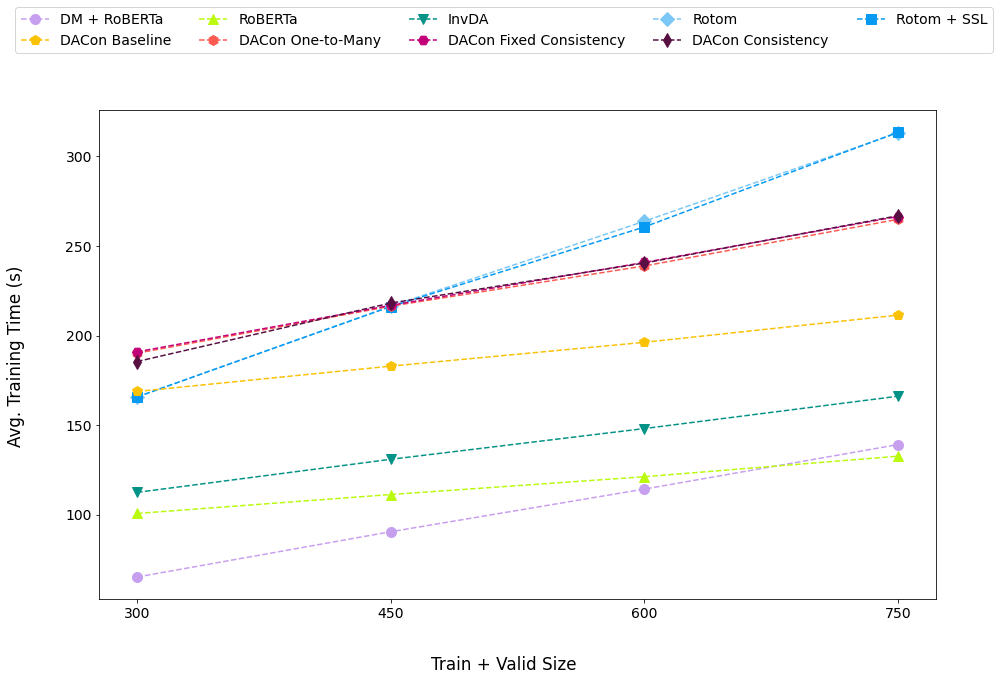

<Figure size 432x288 with 0 Axes>

In [23]:
tmp = df7.reset_index()

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

plt.rcParams["font.size"] = 14
fig, ax = plt.subplots(1, 1, figsize=(15, 9), constrained_layout=True)
sizes = [300, 450, 600, 750]
markers = ["o", "^", "v", "D", "s", "p", "h", "H", "d"]
colors = ["#C79FEF", "#BBF90F", "#029386", "#7BC8F6", "#069AF3", "#FAC205", "#FC5A50", "#C20078", "#580F41"]
fig.supxlabel("Train + Valid Size", y=0.01)
fig.supylabel("Avg. Training Time (s)", x=0.04)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax.set_xticks(sizes)
ax.tick_params(axis='both', which='major', labelsize=14)

for j, (name, (lm, da)) in enumerate(lm_da.items()):
    subgroup = tmp[(tmp["lm"] == lm) & (tmp["da"] == da)]
    time = list(subgroup["time"])
    line = ax.plot(
        sizes, 
        time,
        marker=markers[j], 
        markersize=10.0,
        linestyle="--",
        label=name,
        c=colors[j]
    )

lines, labels = axes[0, 0].get_legend_handles_labels()
ncol = 5

fig.legend(flip(lines, ncol), flip(labels, ncol), bbox_to_anchor=(0.5, 1.05), loc="upper center", ncol=ncol)

if not os.path.isdir("exp_figures"):
    os.makedirs("exp_figures", exist_ok=True)

plt.savefig("exp_figures/time.png", facecolor="white", bbox_inches="tight", pad_inches=0.3)
plt.show()
plt.clf()

In [24]:
df8 = df6.groupby(by=["dataset", "lm", "da", "size"]).mean()

In [25]:
pd.set_option('display.max_rows', df8.shape[0] + 1)
df8

time
dataset                     lm      da                      size            
em_Abt-Buy                  dm      dm                      300    95.220580
                                                            450   133.970200
                                                            600   171.258860
                                                            750   209.259640
                            roberta None                    300    91.271680
                                                            450   100.605980
                                                            600   112.721180
                                                            750   126.462040
                                    auto_ssl                300   117.463320
                                                            450   166.598780
                                                            600   207.564380
                                                            750   241.518740
                                    auto_ssl_no_ssl         300   118.059340
                                                            450   166.802880
                                                            600   207.501900
                                                            750   241.169980
                                    dacon_baseline          300   162.702725
                                                            450   173.660400
                                                            600   189.844040
                                                            750   207.154860
                                    dacon_consistency       300   179.827720
                                                            450   209.160280
                                                            600   234.203380
                                                            750   264.062660
                                    dacon_fixed_consistency 300   179.787700
                                                            450   207.676820
                                                            600   232.923080
                                                            750   262.739180
                                    dacon_one_to_many       300   178.234040
                                                            450   207.274140
                                                            600   231.479300
                                                            750   260.738140
                                    del                     300   101.313360
                                                            450   121.343400
                                                            600   141.323580
                                                            750   161.625360
                                    edbt20                  300    82.566160
                                                            450    97.094420
                                                            600   108.736620
                                                            750   121.573520
                                    invda                   300   100.507980
                                                            450   121.464620
                                                            600   139.986920
                                                            750   161.098060
em_Amazon-Google            dm      dm                      300    39.618940
                                                            450    54.411920
                                                            600    67.720280
                                                            750    82.059820
                            roberta None                    300    58.771320
                                                            450    64.928520
                                                            600    7

/var/folders/zl/yc2y215n1d3gj37jjg_cv5dr0000gn/T/ipykernel_12164/3938127561.py:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.3, hspace=0.3)


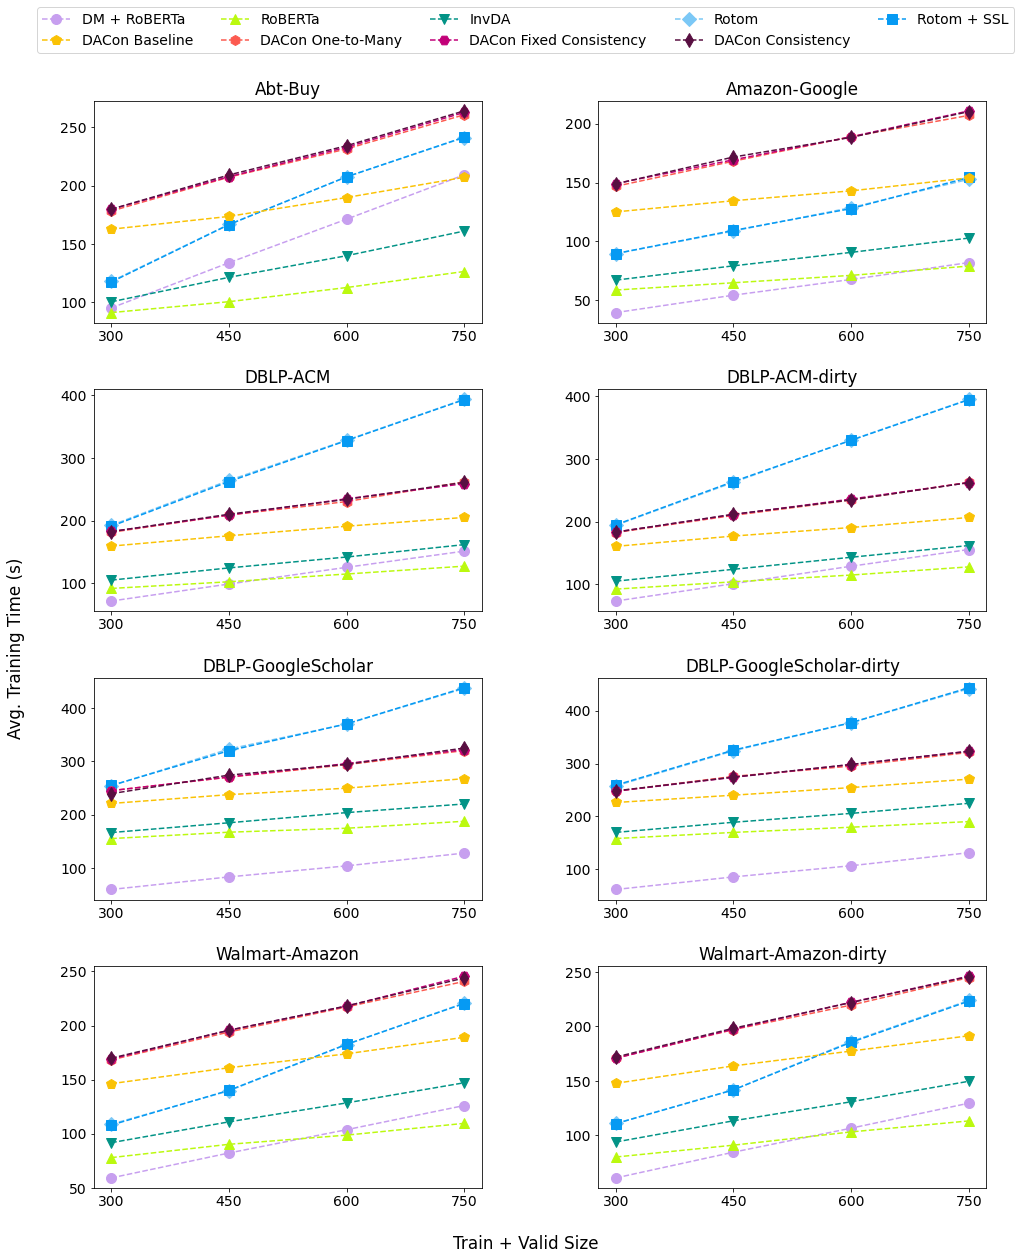

<Figure size 432x288 with 0 Axes>

In [26]:
tmp = df8.reset_index()

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

plt.rcParams["font.size"] = 14
fig, axes = plt.subplots(4, 2, figsize=(16, 20), constrained_layout=True)
sizes = [300, 450, 600, 750]
markers = ["o", "^", "v", "D", "s", "p", "h", "H", "d"]
colors = ["#C79FEF", "#BBF90F", "#029386", "#7BC8F6", "#069AF3", "#FAC205", "#FC5A50", "#C20078", "#580F41"]
fig.supxlabel("Train + Valid Size", y=0.08)
fig.supylabel("Avg. Training Time (s)", x=0.05)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i, dataset in enumerate(tmp["dataset"].unique()):
    group_by_data = tmp[tmp["dataset"] == dataset]
    row, col = i // 2, i % 2
    
    ax = axes[row, col]
    ax.set_xticks(sizes)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(dataset.split("_")[-1])

    for j, (name, (lm, da)) in enumerate(lm_da.items()):
        subgroup = group_by_data[(group_by_data["lm"] == lm) & (group_by_data["da"] == da)]
        time = list(subgroup["time"])
        line = ax.plot(
            sizes, 
            time,
            marker=markers[j], 
            markersize=10.0,
            linestyle="--",
            label=name,
            c=colors[j]
        )

lines, labels = axes[0, 0].get_legend_handles_labels()
ncol = 5

fig.legend(flip(lines, ncol), flip(labels, ncol), bbox_to_anchor=(0.5, 0.95), loc="upper center", ncol=ncol)

if not os.path.isdir("exp_figures"):
    os.makedirs("exp_figures", exist_ok=True)

plt.savefig("exp_figures/time_by_dataset.png", facecolor="white", bbox_inches="tight", pad_inches=0.3)
plt.show()
plt.clf()